In [57]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/helprush/helprush_provider_reliability_dataset.csv


In [58]:
data = pd.read_csv("/kaggle/input/helprush/helprush_provider_reliability_dataset.csv")
data.head()

,provider_id,job_completion_rate,on_time_percent,average_rating,cancellations,complaints,reliable
0,P0000,0.75,0.82,2.31,0,0,0
1,P0001,0.98,0.54,4.71,0,0,0
2,P0002,0.89,0.58,3.52,0,0,0
3,P0003,0.84,0.95,4.48,0,1,0
4,P0004,0.66,0.80,2.96,0,0,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   provider_id          200 non-null    object 
 1   job_completion_rate  200 non-null    float64
 2   on_time_percent      200 non-null    float64
 3   average_rating       200 non-null    float64
 4   cancellations        200 non-null    int64  
 5   complaints           200 non-null    int64  
 6   reliable             200 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 11.1+ KB


In [60]:
data.describe()

,job_completion_rate,on_time_percent,average_rating,cancellations,complaints,reliable
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.79345,0.752600,3.561950,0.815000,0.605000,0.025000
std,0.11760,0.146758,0.922084,0.856999,0.788724,0.156517
min,0.60000,0.500000,2.030000,0.000000,0.000000,0.000000
25%,0.69000,0.630000,2.762500,0.000000,0.000000,0.000000
50%,0.80000,0.770000,3.575000,1.000000,0.000000,0.000000
75%,0.90000,0.870000,4.432500,1.000000,1.000000,0.000000
max,0.99000,1.000000,5.000000,3.000000,4.000000,1.000000


<Axes: >

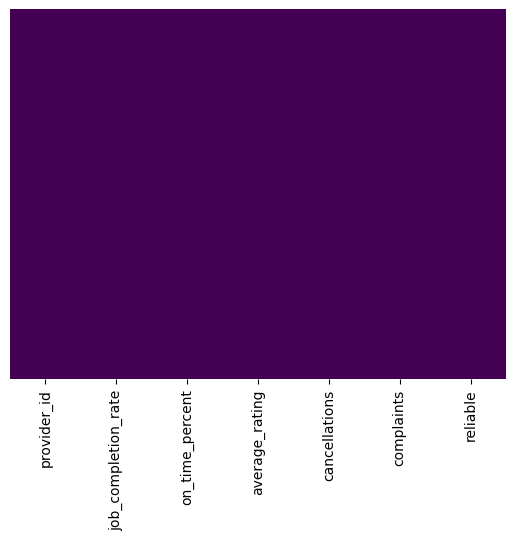

In [61]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [62]:
#dropping identifier
data = data.drop(columns=['provider_id'])
data.head()

,job_completion_rate,on_time_percent,average_rating,cancellations,complaints,reliable
0,0.75,0.82,2.31,0,0,0
1,0.98,0.54,4.71,0,0,0
2,0.89,0.58,3.52,0,0,0
3,0.84,0.95,4.48,0,1,0
4,0.66,0.80,2.96,0,0,0


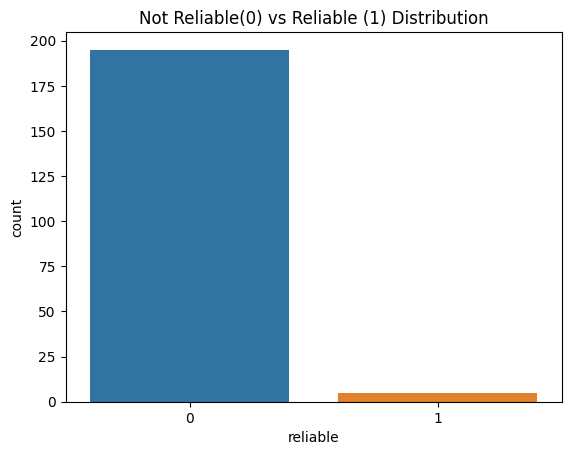

In [63]:
#plotting distrubtion of label
import matplotlib.pyplot as plt
sns.countplot(x='reliable', data=data)
plt.title('Not Reliable(0) vs Reliable (1) Distribution')
plt.show()

In [64]:
y = data["reliable"] # our target variable
X = data.drop(["reliable"], axis=1) # our predictors

In [65]:
from sklearn.preprocessing import StandardScaler

# Creating a scaler object
scaler = StandardScaler()

# Fitting the scaler to the data and transforming the data
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

In [66]:
# train test split is created with 20% for testing set 
#set is stratidied so same porption target labels is ensured
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42,stratify=y)

In [67]:
from sklearn.linear_model import LogisticRegression

# logistic regression model is created while class_weights kept'balanced' to handle this highly imbalanced set
lr = LogisticRegression(class_weight='balanced')

# its trained on training data
lr.fit(X_train, y_train)

# target variable is predicted on the test data
y_pred = lr.predict(X_test)

In [68]:

from sklearn.metrics import accuracy_score

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [69]:
#generating important insights
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.33      1.00      0.50         1

    accuracy                           0.95        40
   macro avg       0.67      0.97      0.74        40
weighted avg       0.98      0.95      0.96        40



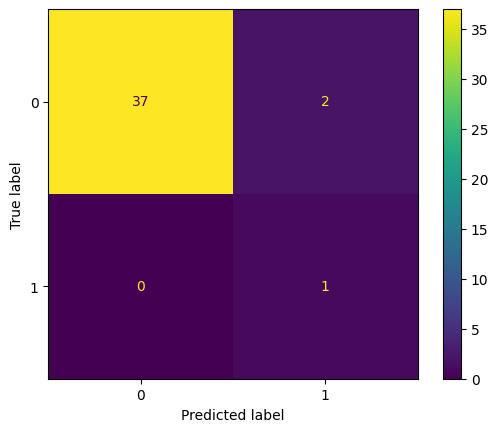

In [70]:
#confusion matrix showing prediction summary
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()


In [71]:
#in similar manner to Logistic Regression while keeping everything same for training a Random Forest Classifier is used
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


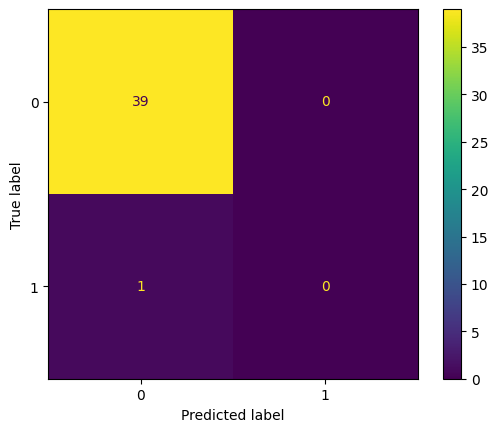

In [74]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()



In [75]:
#shows distribution of train data(its highly imbalanced)
print("Train class distribution:\n", y_train.value_counts())


Train class distribution:
 reliable
0    156
1      4
Name: count, dtype: int64


In [76]:
#shows distribution of test data
print("Test class distribution:\n", y_test.value_counts())


Test class distribution:
 reliable
0    39
1     1
Name: count, dtype: int64


In [77]:
from sklearn import svm
#in similar manner to Logistic Regression while keeping everything same for training a SVM is used
svmc = svm.SVC(kernel='linear',class_weight='balanced') # A Linear Kernel is used
svmc.fit(X_train, y_train)
y_pred = svmc.predict(X_test)


In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.50      1.00      0.67         1

    accuracy                           0.97        40
   macro avg       0.75      0.99      0.83        40
weighted avg       0.99      0.97      0.98        40



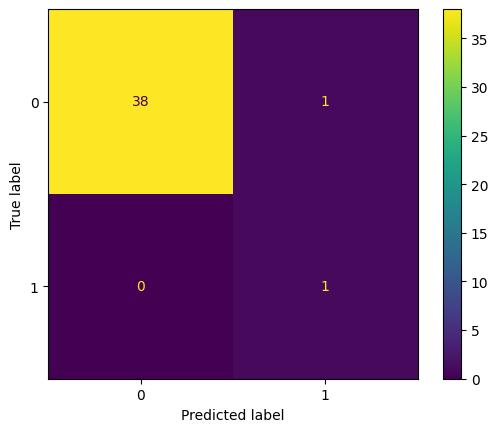

In [80]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()



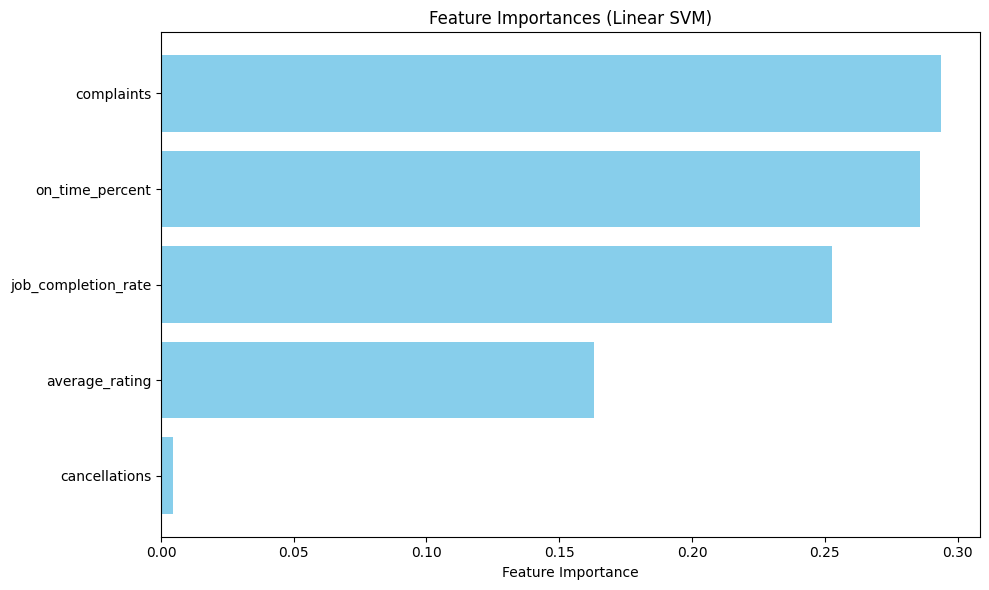

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# absolute coefficients are obtained (importance scores)
imp = np.abs(svmc.coef_[0])

# Normalizing
imp = imp / np.sum(imp)

# Get feature names (where X is a DataFrame)
feature_names = X.columns

# Sort features by importance
indices = np.argsort(imp)[::-1]
sorted_names = feature_names[indices]
sorted_imp = imp[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_names, sorted_imp, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances (Linear SVM)")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

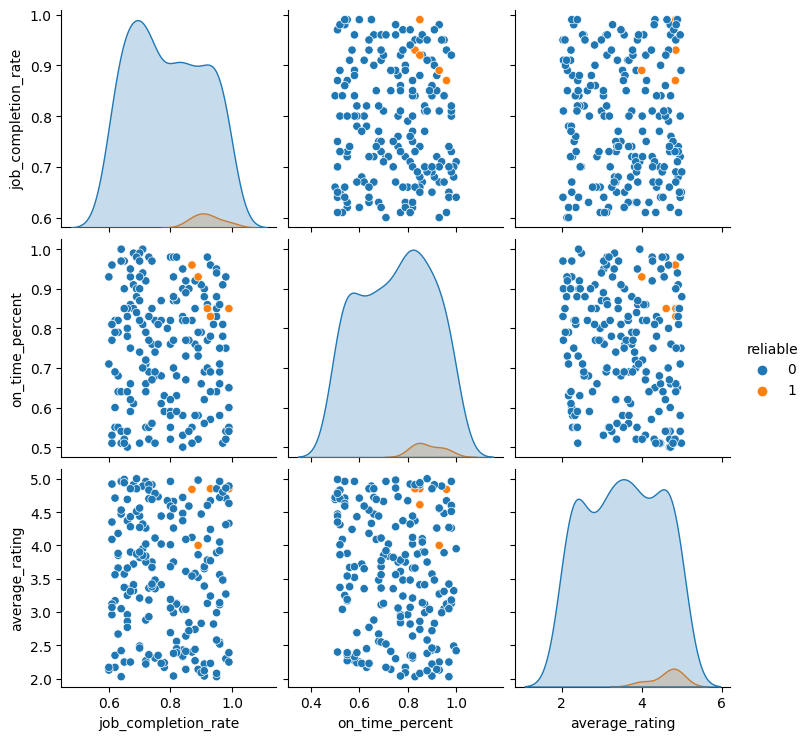

In [86]:
# creating a scatterplot matrix(pairplot) having of all combinations of numeric features.
from seaborn import pairplot
pairplot(data[['job_completion_rate', 'on_time_percent', 'average_rating', 'reliable']], hue='reliable')
plt.show()

In [82]:
#saving the best performing model as pickle file 
import pickle

with open("svm_model.pkl", "wb") as f:
    pickle.dump(svmc, f)

In [87]:
#using svm model to predict on input sample data
inp= [[0.90, 0.94, 4.7, 0, 1]]
prd= svmc.predict(inp)
if prd[0] == 1:
    print("Prediction: RELIABLE")
else:
    print("Prediction: UNRELIABLE")

Prediction: RELIABLE


In [88]:
inp= [[0.60, 0.75, 3.4, 1, 1]]
prd= svmc.predict(inp)
if prd[0] == 1:
    print("Prediction: RELIABLE")
else:
    print("Prediction: UNRELIABLE")

Prediction: UNRELIABLE
